# Creating a Company Database using  MySQL on Jupyter Notebook

In this project, we explore how to use MySQL on Python and create a fictional company database based on 'The Office' (an American TV show).

### What this Notebook shows:
1. General use of MySQL on Jupyter Notebook
2. Create a database based on 'the Office' (US Version)
3. Conclusion & recommendation

### Setup Steps:

First, we need to install MySQL onto the computer. Then, to access a MySQL database from Python, we need a database driver which is the mysql.connector in this case.

In [1]:
# Run to test
import mysql.connector
# If this code shows an error, installation was unsuccessful

We then need to connect to the database using personal username & password. We then create an instance of a cursor class every time we want to execute SQL queries.

In [2]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="lalilulelo"
)

print(mydb)

In [3]:
## Creating an instance of a cursor class (used to execute the SQL statements in Python)
## Note that we don't need semi-colons at the end of each SQL statements now
cursor = mydb.cursor()

We can create, drop and show databases as follows:

##### Note: An error will show if the database does exist when trying to create and/or if the database does not exist when trying to drop.

In [4]:
## Creating an instance of a cursor class (used to execute the SQL statements in Python)
cursor = mydb.cursor()

## 'execute()' method is used to compile a SQL statement

## Create a database called 'theoffice'
cursor.execute("CREATE DATABASE theoffice")

In [ ]:
## Creating an instance of a cursor class (used to execute the SQL statements in Python)
cursor = mydb.cursor()

## Delete a database called 'theoffice' (useful when wanting to start all over)
cursor.execute("DROP DATABASE theoffice")

In [5]:
## Show databases
cursor.execute("SHOW DATABASES")

## 'fetchall()' method fetches all the rows from the last executed statement
databases = cursor.fetchall() 

## Return the list of all databases present
print(databases)

[('information_schema',), ('mysql',), ('performance_schema',), ('redpanda',), ('sys',), ('theoffice',)]


In [6]:
## Showing each database one by one
for database in databases:
    print(database)

('information_schema',)
('mysql',)
('performance_schema',)
('redpanda',)
('sys',)
('theoffice',)


Let's connect to __'theoffice'__ database and play around before creating the full database such as creating a __'intern'__ table and dropping it after.

In [7]:
## Connect to 'theoffice' database

import mysql.connector as mysql

mydb = mysql.connect(
    host = "localhost",
    user = "root",
    passwd = "lalilulelo",
    database = "theoffice"
)

In [8]:
## Create a table called 'intern' within 'theoffice' database
import mysql.connector as mysql

mydb = mysql.connect(
    host = "localhost",
    user = "root",
    passwd = "lalilulelo",
    database = "theoffice"
)

cursor = mydb.cursor()

cursor.execute("CREATE TABLE intern (intern_id INT PRIMARY KEY, name VARCHAR(20), major VARCHAR(20))")

In [9]:
import mysql.connector as mysql

mydb = mysql.connect(
    host = "localhost",
    user = "root",
    passwd = "lalilulelo",
    database = "theoffice"
)

cursor = mydb.cursor()

## 'DESC table_name' is used to get all columns information
cursor.execute("DESC intern")

## Print all the columns as 'tuples' in a list
print(cursor.fetchall())

[('intern_id', 'int(11)', 'NO', 'PRI', None, ''), ('name', 'varchar(20)', 'YES', '', None, ''), ('major', 'varchar(20)', 'YES', '', None, '')]


In [10]:
import mysql.connector as mysql

mydb = mysql.connect(
    host = "localhost",
    user = "root",
    passwd = "lalilulelo",
    database = "theoffice"
)

cursor = mydb.cursor()

## Getting all the tables which are present in 'theoffice' database
cursor.execute("SHOW TABLES")

## Returning tables present in the database
tables = cursor.fetchall() 
print(tables)

[('intern',)]


In [11]:
## Showing all the tables one by one
for table in tables:
    print(table)

('intern',)


In [12]:
## Drop a table called 'intern' within 'theoffice' database
import mysql.connector as mysql

mydb = mysql.connect(
    host = "localhost",
    user = "root",
    passwd = "lalilulelo",
    database = "theoffice"
)

cursor = mydb.cursor()

cursor.execute("DROP TABLE intern")

### Official Start of Database Construction:

A little few notes for the thought process:

We first need a schema to understand how the relationships within the database work. Note that this is fictional and solely based on a TV show and that the sole purpose is to practice MySQL on Python.

In terms of definition:
- A column is an attribute
- A row is an entry 
- A primary key is an unique attribute that uniquely defines an entry
- A foreign key is an attribute that will link to another table within the database
- On delete set null sets NULL when a value is deleted
- On delete cascade deletes the whole row

The __Employee__ table consists of the employee ID (primary key), first name, last name, date of birth, sex, salary, the supervisor's ID (foreign key), their branch's ID (foreign key).

The __Branch__ table consists of the branch name (primary key), the manager's ID (foreign key), the manager's starting date.

The __Client__ consists of the client ID (primary key), client's name, branch's ID worked with (foreign key).

The next two tables use __composite keys__ to identify the relationships clearly:

The __Works With__ table consists of the employee ID (primary key), client ID (primary key) and total sales.

The __Branch Supplier__ consists of the branch ID (primary key), supplier name (primary key), and supply type.

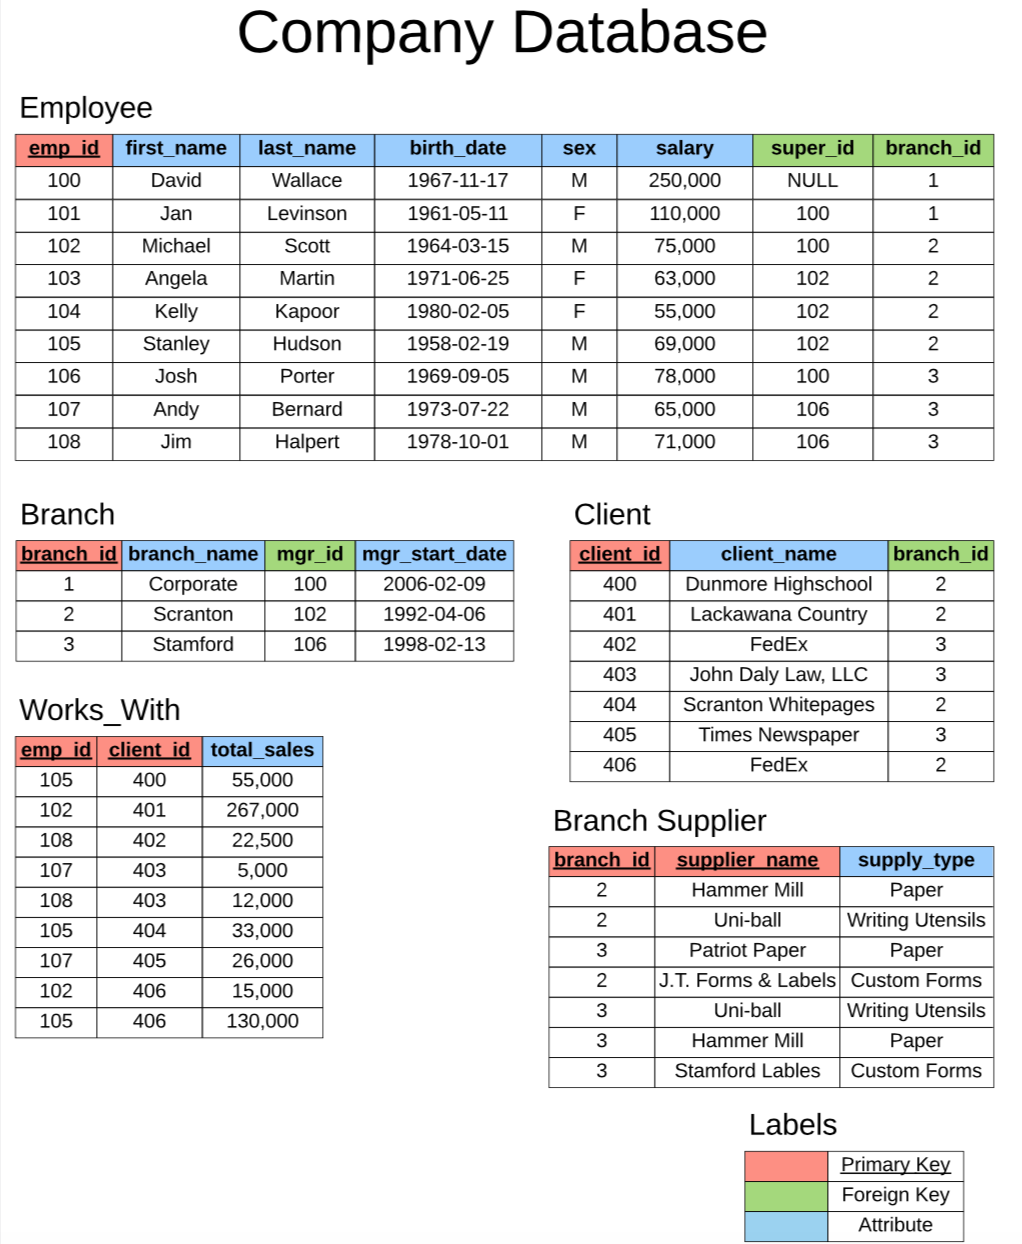

In [13]:
import mysql.connector as mysql

mydb = mysql.connect(
    host = "localhost",
    user = "root",
    passwd = "lalilulelo",
    database = "theoffice"
)

cursor = mydb.cursor()

# Create and alter tables using cursor.execute("")
# We alter after because we cannot specify foreign keys before having created all tables
# Notice the different ON DELETE queries as well
cursor.execute("CREATE TABLE employee (emp_id INT PRIMARY KEY, first_name VARCHAR(40), last_name VARCHAR(40), birth_day DATE, sex VARCHAR(1), salary INT, super_id INT, branch_id INT)")
cursor.execute("CREATE TABLE branch (branch_id INT PRIMARY KEY, branch_name VARCHAR(40), mgr_id INT, mgr_start_date DATE, FOREIGN KEY(mgr_id) REFERENCES employee(emp_id) ON DELETE SET NULL)")
cursor.execute("ALTER TABLE employee ADD FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE SET NULL")
cursor.execute("ALTER TABLE employee ADD FOREIGN KEY(super_id) REFERENCES employee(emp_id) ON DELETE SET NULL") 
cursor.execute("CREATE TABLE client (client_id INT PRIMARY KEY, client_name VARCHAR(40), branch_id INT, FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE SET NULL)") 
cursor.execute("CREATE TABLE works_with (emp_id INT, client_id INT, total_sales INT, PRIMARY KEY(emp_id, client_id), FOREIGN KEY(emp_id) REFERENCES employee(emp_id) ON DELETE CASCADE, FOREIGN KEY(client_id) REFERENCES client(client_id) ON DELETE CASCADE)") 
cursor.execute("CREATE TABLE branch_supplier (branch_id INT, supplier_name VARCHAR(40), supply_type VARCHAR(40), PRIMARY KEY(branch_id, supplier_name), FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE CASCADE)") 

# Let's insert Corporate, Scranton and Stamford employees

# Corporate
cursor.execute("INSERT INTO employee VALUES(100, 'David', 'Wallace', '1967-11-17', 'M', 250000, NULL, NULL)")
cursor.execute("INSERT INTO branch VALUES(1, 'Corporate', 100, '2006-02-09')")
cursor.execute("UPDATE employee SET branch_id = 1 WHERE emp_id = 100")
cursor.execute("INSERT INTO employee VALUES(101, 'Jan', 'Levinson', '1961-05-11', 'F', 110000, 100, 1)")

# Scranton
cursor.execute("INSERT INTO employee VALUES(102, 'Michael', 'Scott', '1964-03-15', 'M', 75000, 100, NULL)")
cursor.execute("INSERT INTO branch VALUES(2, 'Scranton', 102, '1992-04-06')")
cursor.execute("UPDATE employee SET branch_id = 2 WHERE emp_id = 102")
cursor.execute("INSERT INTO employee VALUES(103, 'Angela', 'Martin', '1971-06-25', 'F', 63000, 102, 2)")
cursor.execute("INSERT INTO employee VALUES(104, 'Kelly', 'Kapoor', '1980-02-05', 'F', 55000, 102, 2)")
cursor.execute("INSERT INTO employee VALUES(105, 'Stanley', 'Hudson', '1958-02-19', 'M', 69000, 102, 2)")

# Stamford
cursor.execute("INSERT INTO employee VALUES(106, 'Josh', 'Porter', '1969-09-05', 'M', 78000, 100, NULL)")
cursor.execute("INSERT INTO branch VALUES(3, 'Stamford', 106, '1998-02-13')")
cursor.execute("UPDATE employee SET branch_id = 3 WHERE emp_id = 106")
cursor.execute("INSERT INTO employee VALUES(107, 'Andy', 'Bernard', '1973-07-22', 'M', 65000, 106, 3)")
cursor.execute("INSERT INTO employee VALUES(108, 'Jim', 'Halpert', '1978-10-01', 'M', 71000, 106, 3)")

# Insert into Branch Supplier, Client & Works With Tables

# Branch Supplier
cursor.execute("INSERT INTO branch_supplier VALUES(2, 'Hammer Mill', 'Paper')")
cursor.execute("INSERT INTO branch_supplier VALUES(2, 'Uni-ball', 'Writing Utensils')")
cursor.execute("INSERT INTO branch_supplier VALUES(3, 'Patriot Paper', 'Paper')")
cursor.execute("INSERT INTO branch_supplier VALUES(2, 'J.T. Forms & Labels', 'Custom Forms')")
cursor.execute("INSERT INTO branch_supplier VALUES(3, 'Uni-ball', 'Writing Utensils')")
cursor.execute("INSERT INTO branch_supplier VALUES(3, 'Hammer Mill', 'Paper')")
cursor.execute("INSERT INTO branch_supplier VALUES(3, 'Stamford Lables', 'Custom Forms')")

# Client
cursor.execute("INSERT INTO client VALUES(400, 'Dunmore Highschool', 2)")
cursor.execute("INSERT INTO client VALUES(401, 'Lackawana Country', 2)")
cursor.execute("INSERT INTO client VALUES(402, 'FedEx', 3)")
cursor.execute("INSERT INTO client VALUES(403, 'John Daly Law, LLC', 3)")
cursor.execute("INSERT INTO client VALUES(404, 'Scranton Whitepages', 2)")
cursor.execute("INSERT INTO client VALUES(405, 'Times Newspaper', 3)")
cursor.execute("INSERT INTO client VALUES(406, 'FedEx', 2)")

# Works With

cursor.execute("INSERT INTO works_with VALUES(105, 400, 55000)")
cursor.execute("INSERT INTO works_with VALUES(102, 401, 267000)")
cursor.execute("INSERT INTO works_with VALUES(108, 402, 22500)")
cursor.execute("INSERT INTO works_with VALUES(107, 403, 5000)")
cursor.execute("INSERT INTO works_with VALUES(108, 403, 12000)")
cursor.execute("INSERT INTO works_with VALUES(105, 404, 33000)")
cursor.execute("INSERT INTO works_with VALUES(107, 405, 26000)")
cursor.execute("INSERT INTO works_with VALUES(102, 406, 15000)")
cursor.execute("INSERT INTO works_with VALUES(105, 406, 130000)")

### Queries, Functions, Wildcards, Unions & Nested Queries:

The database should be good to go. We may now perform more queries, functions, wildcards, unions and nested queries.

###### Queries:

In [14]:
# Find all employees
cursor.execute("SELECT * FROM employee")

## fetching all records from the 'cursor' object
employees = cursor.fetchall()

## Showing the query as tuples line by line
## to show it as a list of tuples: print(employees)
for employee in employees:
    print(employee)

(100, 'David', 'Wallace', datetime.date(1967, 11, 17), 'M', 250000, None, 1)
(101, 'Jan', 'Levinson', datetime.date(1961, 5, 11), 'F', 110000, 100, 1)
(102, 'Michael', 'Scott', datetime.date(1964, 3, 15), 'M', 75000, 100, 2)
(103, 'Angela', 'Martin', datetime.date(1971, 6, 25), 'F', 63000, 102, 2)
(104, 'Kelly', 'Kapoor', datetime.date(1980, 2, 5), 'F', 55000, 102, 2)
(105, 'Stanley', 'Hudson', datetime.date(1958, 2, 19), 'M', 69000, 102, 2)
(106, 'Josh', 'Porter', datetime.date(1969, 9, 5), 'M', 78000, 100, 3)
(107, 'Andy', 'Bernard', datetime.date(1973, 7, 22), 'M', 65000, 106, 3)
(108, 'Jim', 'Halpert', datetime.date(1978, 10, 1), 'M', 71000, 106, 3)


In [15]:
# Find Works With table
cursor.execute("SELECT * FROM works_with")

## fetching all records from the 'cursor' object
queries = cursor.fetchall()

## Showing the query as tuples line by line
for query in queries:
    print(query)

(102, 401, 267000)
(102, 406, 15000)
(105, 400, 55000)
(105, 404, 33000)
(105, 406, 130000)
(107, 403, 5000)
(107, 405, 26000)
(108, 402, 22500)
(108, 403, 12000)


In [16]:
# Find all clients
cursor.execute("SELECT * FROM client")

## fetching all records from the 'cursor' object
clients = cursor.fetchall()

## Showing the query as tuples line by line
for client in clients:
    print(client)

(400, 'Dunmore Highschool', 2)
(401, 'Lackawana Country', 2)
(402, 'FedEx', 3)
(403, 'John Daly Law, LLC', 3)
(404, 'Scranton Whitepages', 2)
(405, 'Times Newspaper', 3)
(406, 'FedEx', 2)


In [17]:
# Find all employees ordered by salary ASC OR DESC
cursor.execute("SELECT * from employee ORDER BY salary DESC")

## fetching all records from the 'cursor' object
emp_by_salary = cursor.fetchall()

## Showing the query as tuples line by line
for empsal in emp_by_salary:
    print(empsal)

(100, 'David', 'Wallace', datetime.date(1967, 11, 17), 'M', 250000, None, 1)
(101, 'Jan', 'Levinson', datetime.date(1961, 5, 11), 'F', 110000, 100, 1)
(106, 'Josh', 'Porter', datetime.date(1969, 9, 5), 'M', 78000, 100, 3)
(102, 'Michael', 'Scott', datetime.date(1964, 3, 15), 'M', 75000, 100, 2)
(108, 'Jim', 'Halpert', datetime.date(1978, 10, 1), 'M', 71000, 106, 3)
(105, 'Stanley', 'Hudson', datetime.date(1958, 2, 19), 'M', 69000, 102, 2)
(107, 'Andy', 'Bernard', datetime.date(1973, 7, 22), 'M', 65000, 106, 3)
(103, 'Angela', 'Martin', datetime.date(1971, 6, 25), 'F', 63000, 102, 2)
(104, 'Kelly', 'Kapoor', datetime.date(1980, 2, 5), 'F', 55000, 102, 2)


In [18]:
# Find all employees ordered by sex then name
cursor.execute("SELECT * from employee ORDER BY sex, first_name, last_name")

## fetching all records from the 'cursor' object
emp_sex_name = cursor.fetchall()

## Showing the query as tuples line by line
for empsex in emp_sex_name:
    print(empsex)

(103, 'Angela', 'Martin', datetime.date(1971, 6, 25), 'F', 63000, 102, 2)
(101, 'Jan', 'Levinson', datetime.date(1961, 5, 11), 'F', 110000, 100, 1)
(104, 'Kelly', 'Kapoor', datetime.date(1980, 2, 5), 'F', 55000, 102, 2)
(107, 'Andy', 'Bernard', datetime.date(1973, 7, 22), 'M', 65000, 106, 3)
(100, 'David', 'Wallace', datetime.date(1967, 11, 17), 'M', 250000, None, 1)
(108, 'Jim', 'Halpert', datetime.date(1978, 10, 1), 'M', 71000, 106, 3)
(106, 'Josh', 'Porter', datetime.date(1969, 9, 5), 'M', 78000, 100, 3)
(102, 'Michael', 'Scott', datetime.date(1964, 3, 15), 'M', 75000, 100, 2)
(105, 'Stanley', 'Hudson', datetime.date(1958, 2, 19), 'M', 69000, 102, 2)


In [19]:
# Find the first 5 employees in the table
cursor.execute("SELECT * from employee LIMIT 5")

## fetching all records from the 'cursor' object
five_emp = cursor.fetchall()

## Showing the query as tuples line by line
for empfive in five_emp:
    print(empfive)

(100, 'David', 'Wallace', datetime.date(1967, 11, 17), 'M', 250000, None, 1)
(101, 'Jan', 'Levinson', datetime.date(1961, 5, 11), 'F', 110000, 100, 1)
(102, 'Michael', 'Scott', datetime.date(1964, 3, 15), 'M', 75000, 100, 2)
(103, 'Angela', 'Martin', datetime.date(1971, 6, 25), 'F', 63000, 102, 2)
(104, 'Kelly', 'Kapoor', datetime.date(1980, 2, 5), 'F', 55000, 102, 2)


In [20]:
# Find the first and last names of all employees
cursor.execute("SELECT first_name, last_name FROM employee")

## fetching all records from the 'cursor' object
names = cursor.fetchall()

## Showing the query as tuples line by line
for name in names:
    print(name)

('David', 'Wallace')
('Jan', 'Levinson')
('Michael', 'Scott')
('Angela', 'Martin')
('Kelly', 'Kapoor')
('Stanley', 'Hudson')
('Josh', 'Porter')
('Andy', 'Bernard')
('Jim', 'Halpert')


In [21]:
# Find all employees at branch 2
cursor.execute("SELECT * FROM employee WHERE branch_id = 2")

## fetching all records from the 'cursor' object
branch_2_employees = cursor.fetchall()

## Showing the query as tuples line by line
for bra_2_emp in branch_2_employees:
    print(bra_2_emp)

(102, 'Michael', 'Scott', datetime.date(1964, 3, 15), 'M', 75000, 100, 2)
(103, 'Angela', 'Martin', datetime.date(1971, 6, 25), 'F', 63000, 102, 2)
(104, 'Kelly', 'Kapoor', datetime.date(1980, 2, 5), 'F', 55000, 102, 2)
(105, 'Stanley', 'Hudson', datetime.date(1958, 2, 19), 'M', 69000, 102, 2)


In [22]:
# Find all employees named Jim, Michael, Johnny or David
cursor.execute("SELECT * FROM employee WHERE first_name IN ('Jim', 'Michael', 'Johnny', 'David')")

## fetching all records from the 'cursor' object
empo = cursor.fetchall()

## Showing the query as tuples line by line
for empoy in empo:
    print(empoy)

(100, 'David', 'Wallace', datetime.date(1967, 11, 17), 'M', 250000, None, 1)
(102, 'Michael', 'Scott', datetime.date(1964, 3, 15), 'M', 75000, 100, 2)
(108, 'Jim', 'Halpert', datetime.date(1978, 10, 1), 'M', 71000, 106, 3)


We could also do all these queries using magic SQL functions with the SQLAlchemy toolkil, which was skipped in this project.

On another note, we can take those query results, make them into pandas dataframes and export them as CSV files as below:

In [23]:
# Example for Employees:

# import pandas to use pandas DataFrame 
import pandas as pd

# Note that the data must be in the form of list of tuples 
# Hence we use the 'employees' variable and not 'employee'

# create DataFrame using data
df = pd.DataFrame(employees,
                  columns =['Emp ID','First Name','Last Name','Date of Birth','Sex','Salary','Sup ID','Branch ID'])
df

,Emp ID,First Name,Last Name,Date of Birth,Sex,Salary,Sup ID,Branch ID
0,100,David,Wallace,1967-11-17,M,250000,NaN,1
1,101,Jan,Levinson,1961-05-11,F,110000,100.0,1
2,102,Michael,Scott,1964-03-15,M,75000,100.0,2
3,103,Angela,Martin,1971-06-25,F,63000,102.0,2
4,104,Kelly,Kapoor,1980-02-05,F,55000,102.0,2
5,105,Stanley,Hudson,1958-02-19,M,69000,102.0,2
6,106,Josh,Porter,1969-09-05,M,78000,100.0,3
7,107,Andy,Bernard,1973-07-22,M,65000,106.0,3
8,108,Jim,Halpert,1978-10-01,M,71000,106.0,3


In [24]:
# Export dataframe to CSV file
# df.to_csv('Employees.csv')

###### Functions:
Although we could apply NumPy after converting the tables into dataframes, we can also apply SQL functions within Jupyter as follows:

In [25]:
# Find the number of employees
cursor.execute("SELECT COUNT(emp_id) FROM employee")

## fetching all records from the 'cursor' object
emp_counts = cursor.fetchall()

## Showing the query as tuples line by line
for emp_count in emp_counts:
    print(emp_count)

(9,)


In [26]:
# Find the average of all employee's salaries
cursor.execute("SELECT AVG(salary) FROM employee")

## fetching all records from the 'cursor' object
ave_sals = cursor.fetchall()

## Showing the query as tuples line by line
for ave_sal in ave_sals:
    print(ave_sal)

(Decimal('92888.8889'),)


In [27]:
# Find the sum of all employee's salaries
cursor.execute("SELECT SUM(salary) FROM employee")

## fetching all records from the 'cursor' object
sum_sals = cursor.fetchall()

## Showing the query as tuples line by line
for sum_sal in sum_sals:
    print(sum_sal)

(Decimal('836000'),)


In [28]:
# Find out how many males and females there are
cursor.execute("SELECT COUNT(sex), sex FROM employee GROUP BY sex")

## fetching all records from the 'cursor' object
sexes = cursor.fetchall()

## Showing the query as tuples line by line
for sex in sexes:
    print(sex)

(6, 'M')
(3, 'F')


In [29]:
# Find the total amount of money spent by each client
cursor.execute("SELECT SUM(total_sales), client_id FROM works_with GROUP BY client_id")

## fetching all records from the 'cursor' object
cash_amounts = cursor.fetchall()

## Showing the query as tuples line by line
for cash in cash_amounts:
    print(cash)

(Decimal('55000'), 400)
(Decimal('267000'), 401)
(Decimal('22500'), 402)
(Decimal('17000'), 403)
(Decimal('33000'), 404)
(Decimal('26000'), 405)
(Decimal('145000'), 406)


###### Wildcards:

Remember that in MySQL:

-  % = any number of characters
-  _ = one character

In [30]:
# Find any client's who are an LLC
cursor.execute("SELECT * FROM client WHERE client_name LIKE '%LLC'")

## fetching all records from the 'cursor' object
clients_LLC = cursor.fetchall()

## Showing the query as tuples line by line
for client_LLC in clients_LLC:
    print(client_LLC)

(403, 'John Daly Law, LLC', 3)


In [31]:
# Find any employee born on the 10th day of the month
cursor.execute("SELECT * FROM employee WHERE birth_day LIKE '____-10%'")

## fetching all records from the 'cursor' object
born_emps = cursor.fetchall()

## Showing the query as tuples line by line
for born_emp in born_emps:
    print(born_emp)

(108, 'Jim', 'Halpert', datetime.date(1978, 10, 1), 'M', 71000, 106, 3)


###### Unions:

Unions must have same data type and must have same dimension.

In [32]:
# Find a list of employee and branch names
cursor.execute("SELECT employee.first_name AS Employee_Branch_Names FROM employee UNION SELECT branch.branch_name FROM branch")

## fetching all records from the 'cursor' object
list_emp_branch = cursor.fetchall()

## Showing the query as tuples line by line
for list_emp_bran in list_emp_branch:
    print(list_emp_bran)

('David',)
('Jan',)
('Michael',)
('Angela',)
('Kelly',)
('Stanley',)
('Josh',)
('Andy',)
('Jim',)
('Corporate',)
('Scranton',)
('Stamford',)


###### Nested Queries:

In [33]:
# Find names of all employees who have sold over 50,000
cursor.execute("SELECT employee.first_name, employee.last_name FROM employee WHERE employee.emp_id IN (SELECT works_with.emp_id FROM works_with WHERE works_with.total_sales > 50000)")
## fetching all records from the 'cursor' object
good_sellers = cursor.fetchall()

## Showing the query as tuples line by line
for good_seller in good_sellers:
    print(good_seller)

('Michael', 'Scott')
('Stanley', 'Hudson')


In [34]:
# Find all clients who are handled by the branch that Michael Scott manages
# Here we assume to know Michael Scott's ID
cursor.execute("SELECT client.client_id, client.client_name FROM client WHERE client.branch_id = (SELECT branch.branch_id FROM branch WHERE branch.mgr_id = 102)")

## fetching all records from the 'cursor' object
branch_clients = cursor.fetchall()

## Showing the query as tuples line by line
for branch_client in branch_clients:
    print(branch_client)

(400, 'Dunmore Highschool')
(401, 'Lackawana Country')
(404, 'Scranton Whitepages')
(406, 'FedEx')


In [35]:
# Find the names of employees who work with clients handled by the scranton branch
# Here we assume to know Michael Scott's ID
cursor.execute("SELECT employee.first_name, employee.last_name FROM employee WHERE employee.emp_id IN (SELECT works_with.emp_id FROM works_with) AND employee.branch_id = 2")

## fetching all records from the 'cursor' object
branch_clients_emps = cursor.fetchall()

## Showing the query as tuples line by line
for branch_client_emp in branch_clients_emps:
    print(branch_client_emp)

('Michael', 'Scott')
('Stanley', 'Hudson')


In [36]:
# Find the names of all clients who have spent more than 100,000 dollars
# Here we assume to know Michael Scott's ID
cursor.execute("SELECT client.client_name FROM client WHERE client.client_id IN (SELECT client_id FROM (SELECT SUM(works_with.total_sales) AS totals, client_id FROM works_with GROUP BY client_id) AS total_client_sales WHERE totals > 100000)")

## fetching all records from the 'cursor' object
good_clients = cursor.fetchall()

## Showing the query as tuples line by line
for good_client in good_clients:
    print(good_client)

('Lackawana Country',)
('FedEx',)


# Conclusion

This database explored the basics of using MySQL straight inside Jupyter Notebook and creating a database using a MySQL connector with Python. I personally like writing SQL queries on PopSQL as the UI (User Interface) is more appealing (I use the free version but the premium monthly subscription isn't very pricey considering it works well with different types of databases). Editing code as a team, visualizing data and exporting the data into CSV or JSON files are also simplified with PopSQL. However, you cannot create or drop a database within as it is only an editor software. This is where using Jupyter Notebook is more practical to play with MySQL. One thing to note is how inefficient it is to write code this way. Another more efficient way to write SQL queries on Jupyter Notebook is to use magic functions with SQLAlchemy toolkit mentioned within the project. Also mentioned above, Python libraries, such as Pandas and/or NumPy, can also be used to better visualize the database tables and export them onto Excel or CSV.